<a href="https://colab.research.google.com/github/xalejandrow/hypothesis-testing-exercises-project-with-python/blob/main/Palmer_Penguins_Analysis_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway
%matplotlib inline

In [22]:
# Credits:
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
# Archipelago (Antarctica) penguin data. R package version 0.1.0.
# https://allisonhorst.github.io/palmerpenguins/
url = 'https://gist.githubusercontent.com/slopp/'+ \
      'ce3b90b9168f2f921784de84fa445651/raw/' + \
      '4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
df = pd.read_csv(url)

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=400/>

**Image 1.** Penguins drawing. Artwork by @allison_hors.

In [4]:
#print(url)

In [21]:
from scipy.stats.stats import describe
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              342 non-null    int64  
 1   species            342 non-null    object 
 2   island             342 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               342 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.7+ KB


In [16]:
# Show 10 observations
df.sample(10)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
201,202,Gentoo,Biscoe,45.2,15.8,215.0,5300.0,male,2008
101,102,Adelie,Biscoe,41.0,20.0,203.0,4725.0,male,2009
212,213,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,female,2008
282,283,Chinstrap,Dream,46.1,18.2,178.0,3250.0,female,2007
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009
62,63,Adelie,Biscoe,37.6,17.0,185.0,3600.0,female,2008
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
12,13,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
280,281,Chinstrap,Dream,52.7,19.8,197.0,3725.0,male,2007
200,201,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,female,2008


In [23]:
df.head(10)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=400/>

**Image 2.** Penguins dimensions. Artwork by @allison_hors.

In [28]:
# Drop na values, but explain your rule of decision
df = df.dropna(subset=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])

In [29]:
# Get a basic summary of the data
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,172.701754,43.921930,17.151170,200.915205,4201.754386,2008.029240
std,99.174948,5.459584,1.974793,14.061714,801.954536,0.817168
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,87.250000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.750000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [30]:
from pandas._libs.hashtable import value_count
# How many penguins by species and island we have?
df[['species','island']].value_counts()

species    island   
Gentoo     Biscoe       123
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     51
           Biscoe        44
dtype: int64

In [32]:
pd.crosstab(df['species'],df['island'])

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,51
Chinstrap,0,68,0
Gentoo,123,0,0


In [40]:
# Get the basic metrics (mean, median, std, max, min) per species
df.groupby('species')['body_mass_g'].agg(['mean','median','std','min','max'])
#df.groupby('species')['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'].agg(['mean','median','std','min','max'])
#df.groupby('species').agg(['mean','median','std','min','max'])


,mean,median,std,min,max
species,,,,,
Adelie,3700.662252,3700.0,458.566126,2850.0,4775.0
Chinstrap,3733.088235,3700.0,384.335081,2700.0,4800.0
Gentoo,5076.016260,5000.0,504.116237,3950.0,6300.0


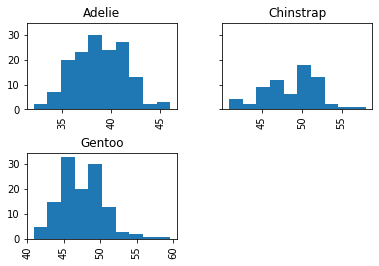

In [53]:
# Show the histogram per bill lenght
df.hist(column='bill_length_mm', by='species',sharey='true')
plt.show()

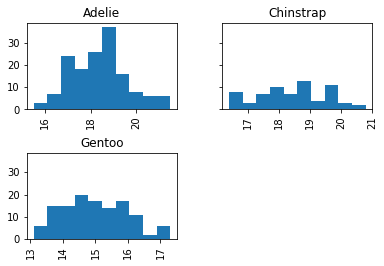

In [52]:
# Show the histogram per bill depth
df.hist(column='bill_depth_mm', by='species',sharey='true')
plt.show()

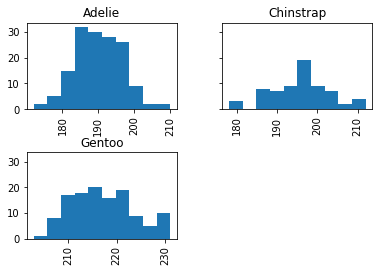

In [51]:
# Show the histogram per flipper length 
df.hist(column='flipper_length_mm', by='species',sharey='true')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


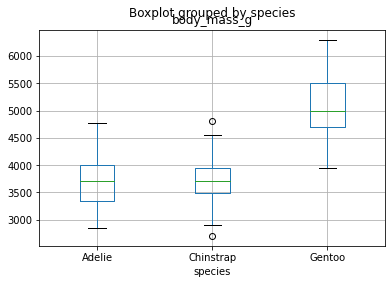

In [50]:
# Show a boxplot of body mass per species
df.boxplot(column='body_mass_g', by='species')
plt.show()

In [55]:
fig = px.box(df,x='species',y='body_mass_g', color='species')
fig.show()

In [56]:
# Show a bivariate plot of bill length and bill depth
fig = px.scatter(df, x='bill_length_mm', y='bill_depth_mm', color='species')
fig.show()

In [57]:
# Is there a way to be more effective?
fig = px.scatter_matrix(df, dimensions=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'], color='species')
fig.show()

In [59]:
# What percentage of Gentoo penguins weights less than 5000 (visually) 
# ecdf = empirical cumulative distribution frequency
fig = px.ecdf(df[df['species']=='Gentoo'],x='body_mass_g')
fig.show()

In [62]:
# Is there a difference between Adelie penguins from each island?
# alpha = 0.05
# reject_H0 = p_value < alpha 
Adeline_Dream = df[(df['species']=='Adelie') & (df['island']=='Dream')]
Adeline_Biscoe = df[(df['species']=='Adelie') & (df['island']=='Biscoe')]
Adeline_Torgersen = df[(df['species']=='Adelie') & (df['island']=='Torgersen')]


In [63]:
f_oneway(Adeline_Dream['body_mass_g'],Adeline_Biscoe['body_mass_g'],Adeline_Torgersen['body_mass_g'])

F_onewayResult(statistic=0.03204821591407108, pvalue=0.9684666047614272)

No se rechaza H0 

No se rechaza que los pesos promedio son iguales (H0)

No se puede rechazar que los pesos promedios son iguales 

In [64]:
# Show the boxplot of Adelie penguins by island
#fig = px.box(df[df['species']=='Adelie'], x = 'species', y= 'body_mass_g', color='island')
fig = px.box(df[df['species']=='Adelie'],y= 'body_mass_g', color='island')
fig.show()